In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
import time
from sklearn import metrics
import numpy as np
import process as p


In [420]:
import matplotlib.pyplot as plt

def getmyData(filepath):
  l = p.getData(filepath)
  l = l[1:10000]
  np.random.shuffle(l)
  lgt = len(l)
  ltrain = l[:int(lgt * 0.8)]
  ltest = l[int(lgt * 0.8):]
  Y_train = ltrain[:,0]
  Y_train = np.array([int(e) for e in Y_train])
  X_train = ltrain[:,1]
  Y_test = ltest[:,0]
  Y_test = np.array([int(e) for e in Y_test])
  X_test = ltest[:,1]
  return (X_train, Y_train,X_test,Y_test)


def classify(clf, data_train, train_labels, data_test, test_labels, ngrams = (1,1), binn = False, idf = True):
  t0 = time.time()
  if (binn == True):
    idf = False
  vec = TfidfVectorizer(use_idf = idf, binary = binn, ngram_range = ngrams )
  X_train_tfidf = vec.fit_transform(data_train) 
  X_test_tfidf =  vec.transform(data_test)
  clf.fit(X_train_tfidf,train_labels)
  predicted = clf.predict(X_test_tfidf)
  #print(pred)
  #print(test_labels)
  acc = metrics.accuracy_score(test_labels, predicted)
  recall = metrics.recall_score(test_labels, predicted)
  pre = metrics.precision_score(test_labels, predicted)
  dur = time.time() - t0
  return (pre, recall, acc, dur)
'''
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))
'''

def bench():
    clf = MultinomialNB()
    clfs = [(MultinomialNB(alpha=.01), "Multinomial NB"),
        (BernoulliNB(alpha=.01), "BernoulliNB"),
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"), 
        (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")]
    results = []
    filepath = 'file2.csv'
    X_tr,Y_tr,X_te,Y_te = getmyData(filepath)
 # av_pre, rec, acc, dur = classify(clf, X_tr, Y_tr, X_te, Y_te, binn = False)
  #return acc
    for clf, name in clfs:
        results.append(classify(clf, X_tr, Y_tr, X_te, Y_te, binn = False))
    plot_result(clfs, np.array(results))
  
  

In [405]:
def autolabels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height * 100) + "%",
              ha='center', va='bottom')


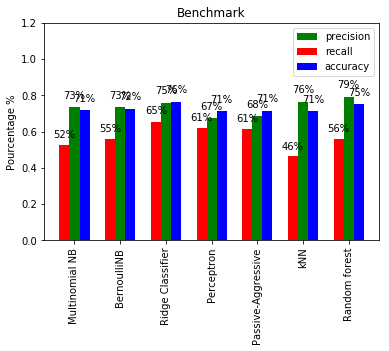

In [421]:
def plot_result(clfs, results):
    N = len(clfs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.22    # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind , results[:,0], width, color='g')
    rects2 = ax.bar(ind - width, results[:,1], width, color='r')
    rects3 = ax.bar(ind + width, results[:,2], width, color='b')
# add some text for labels, title and axes ticks
    ax.set_ylim(0,1.2)
    ax.set_ylabel('Pourcentage %')
    ax.set_title("Benchmark")
    ax.set_xticks(ind )
    ax.set_xticks(ind )
    labels = [clfs[i][1] for i in range(N)]
    ax.set_xticklabels(labels, rotation = 'vertical')
    ax.legend((rects1[0], rects2[0], rects3[0]), ('precision', 'recall', 'accuracy'))
    

    autolabels(rects1, ax)
    autolabels(rects2, ax)
    autolabels(rects3, ax)
    plt.show()    
    

bench()


In [322]:
bench()

In [411]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
def test(clfs, results):
    N = 
    men_means = (20, 35, 30, 35, 27)
    men_std = (2, 3, 4, 1, 2)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, results, width, color='r', yerr=men_std)

    women_means = (25, 32, 34, 20, 25)
    women_std = (3, 5, 2, 3, 3)
    rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

    ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))



    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
              ha='center', va='bottom')



    plt.show()

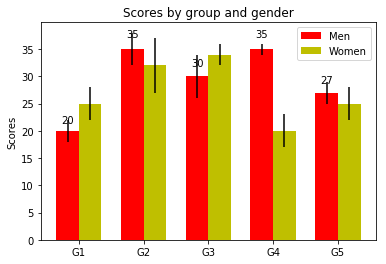

In [306]:
test()

In [261]:
def plot_results(clfs, results):
    print(len(clfs))
    x = [i for i in range(len(clfs))]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flatten()
    fig.canvas.draw()
    labels = [clfs[i][1] for i in range(len(clfs))]
    precisions = results[:,0]
    recalls = results[:,1]
    accuracys = results[:,2]
    times  = results[:,3]
    ax0.set_ylim(0, 1)
    ax0.bar(x, precisions, align='center', color = "green")
    #ax0.legend(prop={'size': 10})
    ax0.set_title('precision')
    ax0.set_xticklabels(labels, rotation='vertical')
    
    
    ax1.set_ylim(0, 1)
    ax1.bar(x, recalls, align='center', color ="red")
    ax1.set_title('recall')
    ax1.set_xticklabels(labels, rotation='vertical')
    
    ax2.set_ylim(0, 1)
    ax2.bar(x, accuracys, align='center', color = "y")
    ax2.set_title('accuracys')
    ax2.set_xticklabels(labels, rotation='vertical')
# Make a multiple-histogram of data-sets with different length.
    #x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
    ax3.bar(x, times, align='center')
    ax3.set_title('times')
    ax3.set_xticklabels(labels, rotation='vertical')
    fig.tight_layout()
    plt.show()

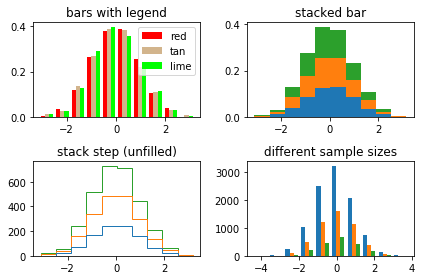

In [137]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

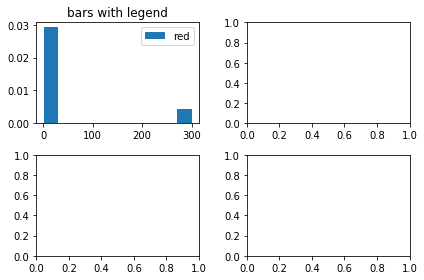

In [100]:
bench

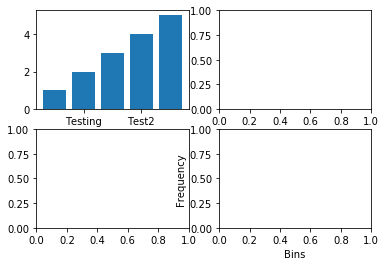

In [142]:
import matplotlib.pyplot as plt

x = (1,2,3,4,5)
y = (1,2,3,4,5)

fig.canvas.draw()

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.bar(x,y,align='center') # A bar chart
labels = [item.get_text() for item in ax0.get_xticklabels()]
labels[1] = 'Testing'
labels[2] = 'Test2'
ax0.set_xticklabels(labels)

plt.xlabel('Bins')
plt.ylabel('Frequency')
 # Here you are drawing the horizontal lines
plt.show()